In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
import quandl

In [149]:
data=quandl.get("NSE/GAIL")

In [150]:
data.tail(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-07,346.00,347.00,330.80,335.25,334.70,7224133.0,24215.17
2018-12-10,332.80,337.85,328.00,332.50,332.05,4866821.0,16197.45
2018-12-11,330.20,335.45,329.70,332.85,332.55,6985033.0,23214.09
2018-12-12,335.00,345.50,331.10,343.75,344.45,3841601.0,13066.65
2018-12-13,345.45,348.30,340.20,346.50,346.45,3355227.0,11554.79
2018-12-14,346.95,353.20,341.50,351.30,351.25,2004546.0,6960.99
2018-12-17,351.30,355.40,350.60,353.40,353.15,2135558.0,7536.12
2018-12-18,353.00,357.20,349.70,354.00,354.50,3459455.0,12255.09
2018-12-19,356.00,359.40,352.80,358.45,358.50,2697995.0,9614.07


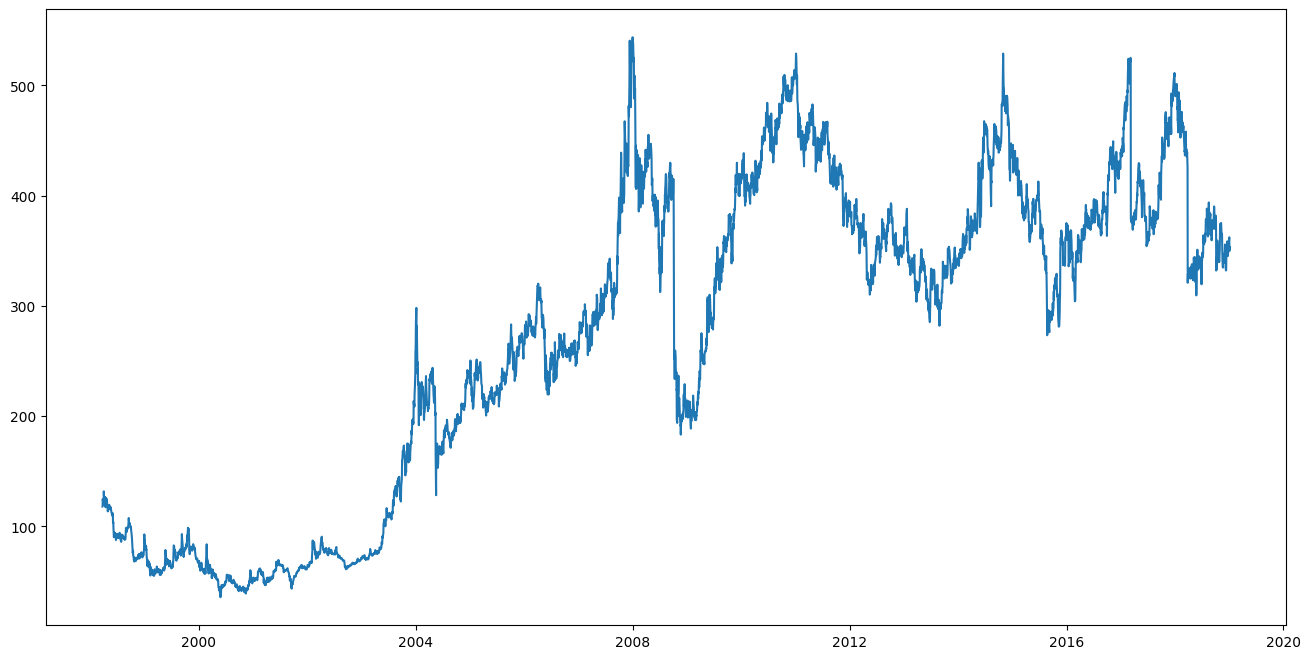

In [151]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='Closing Price')

In [152]:
data['Open-Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']
data=data.dropna()

#we ll use these differences to calculate if we wanna buy or sell

In [153]:
# classification problem: buy(+1) or sell(-1) stock

In [154]:
X=data[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
1998-03-23,-0.50,0.75
1998-03-24,1.55,5.50
1998-03-25,-2.90,5.00
1998-03-26,2.55,6.00
1998-03-27,-1.75,3.25


In [155]:
# intention is to store +1 for buy signal and -1 for sell signal

In [156]:
#shift(-1)->shifts the column up or dow 
#the below statement means that if the next day closing rate is higher than previous day closing rate 
#then we want to buy the stock(+1)
#else if next day rate is lower than previous we wanna sell the stock(-1)
Y=np.where(data['Close'].shift(-1)>data['Close'],'BUY','SELL')
print(Y)

['BUY' 'BUY' 'SELL' ... 'SELL' 'BUY' 'SELL']


In [157]:
#splitting data into two parts training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=44)

In [158]:
# implementation of knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find best param
param={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,param,cv=5)

#fit the model
model.fit(X_train,y_train)

#accuracy score
accuracy_train=accuracy_score(y_train,model.predict(X_train))
accuracy_test=accuracy_score(y_test,model.predict(X_test))

print('Train data accuracy is: %2f' %accuracy_train)
print('Test data accuracy is : %2f'%accuracy_test)


Train data accuracy is: 0.644364
Test data accuracy is : 0.544753


In [159]:
predictions_classification=model.predict(X_test)
actual_predicted_data=pd.DataFrame({'Actual Class':y_test,'Predicted Class':predictions_classification})
actual_predicted_data.head(30)

,Actual Class,Predicted Class
0,SELL,BUY
1,SELL,BUY
2,SELL,SELL
3,BUY,BUY
4,BUY,BUY
5,BUY,BUY
6,BUY,SELL
7,BUY,BUY
8,BUY,BUY
9,SELL,SELL


In [160]:
#Regression
y=data['Close']
#in classification y value was +1 or -1 but in regression we ll have y as data at closing


In [161]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg,X_test_reg,y_train_reg,y_test_reg= train_test_split(X,y,test_size=0.25,random_state=44)

params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg,params,cv=5)

model_reg.fit(X_train_reg,y_train_reg)
predictions=model_reg.predict(X_test_reg)

print(predictions)

[121.58666667 237.48       346.35333333 ... 399.55333333 334.17333333
 355.34333333]


In [171]:
# for x
prediction_forwhole=model_reg.predict(X)
rmse=np.sqrt(np.mean(np.power((np.array(y)-np.array(prediction_forwhole)),2)))
print('rmse is : %2f'%rmse)

rmse is : 83.307410


In [ ]:

actual_predicted_close=pd.DataFrame({'Actual Close':y_test_reg,'Predicted Close value':predictions})
actual_predicted_close.sort_index(inplace=True)
actual_predicted_close.head(20)

,Actual Close,Predicted Close value
Date,,
1998-04-06,125.75,105.483333
1998-04-28,113.55,96.893333
1998-05-27,111.75,97.590000
1998-05-28,110.35,84.260000
1998-06-02,103.75,391.410000
1998-06-10,93.50,94.086667
1998-06-22,87.55,93.910000
1998-06-25,90.50,93.783333
1998-06-30,93.20,93.563333


In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_test_reg)-np.array(predictions)),2)))
rms

86.69225903432567

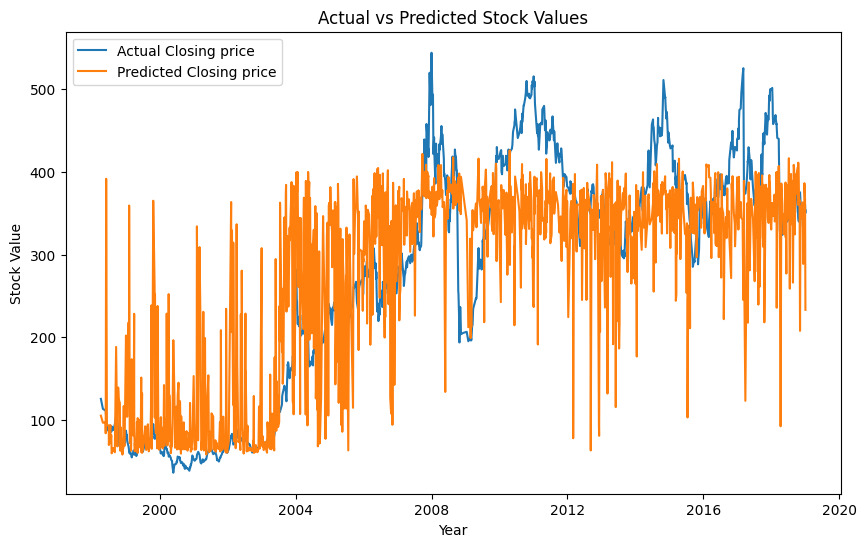

In [ ]:
# Plotting the actual vs. predicted values

plt.figure(figsize=(10, 6))
plt.plot(actual_predicted_close['Actual Close'], label='Actual Closing price')
plt.plot(actual_predicted_close['Predicted Close value'], label='Predicted Closing price')


plt.xlabel('Year')
plt.ylabel('Stock Value')
plt.title('Actual vs Predicted Stock Values')
plt.legend()

plt.show()